In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [8]:
df = pd.read_csv('dataset_bps_15.csv', sep=',')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,-15.2,-18.4,-16.4,-23.5,-25.5,-29.0,-23.5,-21.9,-16.4,-25.5,-23.5,-16.4,-18.4,-16.4,-26.4,0
1,-25.5,-18.4,-16.4,-25.5,-21.9,-23.5,-21.0,-25.5,-16.4,-21.0,-25.5,-18.4,-15.2,-18.4,-25.5,0
2,-18.4,-21.9,-16.4,-28.4,-26.4,-21.0,-25.5,-21.0,-21.9,-15.2,-21.9,-23.5,-28.4,-29.0,-26.4,0
3,-29.0,-23.5,-15.2,-23.5,-16.4,-23.5,-21.0,-16.4,-25.5,-23.5,-21.0,-25.5,-21.0,-21.9,-16.4,0
4,-23.5,-16.4,-23.5,-16.4,-26.4,-29.0,-23.5,-15.2,-21.9,-23.5,-16.4,-18.4,-25.5,-29.0,-25.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,-21.9,-21.0,-23.5,-25.5,-28.4,-29.0,-25.5,-21.9,-21.9,-18.4,-16.4,-25.5,-23.5,-28.4,-21.0,1
449,-21.9,-21.0,-23.5,-25.5,-28.4,-21.0,-25.5,-28.4,-28.4,-21.0,-16.4,-28.4,-25.5,-18.4,-16.4,1
450,-21.0,-28.4,-23.5,-25.5,-16.4,-18.4,-21.9,-21.9,-25.5,-29.0,-28.4,-25.5,-23.5,-21.0,-21.9,1
451,-15.2,-21.0,-23.5,-25.5,-21.0,-21.9,-21.9,-15.2,-21.9,-23.5,-29.0,-23.5,-25.5,-21.0,-21.9,1


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_classifier.predict(X_test)

Accuracy: 0.7692307692307693
Confusion matrix:
[[43  5]
 [16 27]]
Precision: 0.7862817796610169
Recall: 0.7618701550387597
F1-Score: 0.7618691588785047


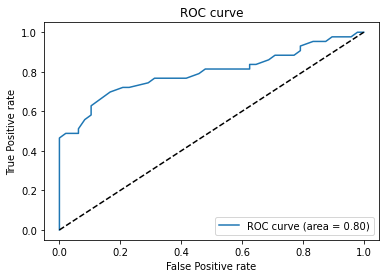

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)


y_scores = rf_classifier.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)


plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()